In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
link='https://drive.google.com/open?id=1XyM6a8dIs6XZJwgsQ86Qx9aWn_SH1QP_'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('clean.csv')

1XyM6a8dIs6XZJwgsQ86Qx9aWn_SH1QP_


In [0]:
import pandas as pd

In [4]:
df = pd.read_csv("clean.csv", engine="python", index_col=0)
df.head()

,text,sentiment
0,awww thats a bummer you shoulda got david car...,0
1,is upset that he cant update his facebook by t...,0
2,i dived many times for the ball managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,no its not behaving at all im mad why am i he...,0


# Global Configuration

In [0]:
MAX_WORDS = 20
EMBEDDING_SIZE = 50
BATCH_SIZE = 1024
EPOCHS = 7
LSTM_CELLS = 100
LSTM_DROPOUT = 0.5
DROPOUT_AFTER_EMBEDDING = 0.2

# Tokenization

In [0]:
x = df['text']
y = [1 if x == 4 else 0 for x in df['sentiment']]

In [7]:
from keras.preprocessing import sequence 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
x = pad_sequences(tokenizer.texts_to_sequences(x), maxlen=MAX_WORDS, padding="post")

vocab_size = len(tokenizer.word_index) + 1
print('vocab size is : ', vocab_size)



Using TensorFlow backend.


vocab size is :  424606


In [8]:
total_words = 0
for rev in df['text']:
  total_words += len(rev.split())

print("words/review average : ", total_words/1600000)

words/review average :  12.392103125


# Neural Network


In [9]:
# Build the model
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU
from keras import optimizers
from keras import regularizers

model=Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=MAX_WORDS))
model.add(Dropout(DROPOUT_AFTER_EMBEDDING))
model.add(LSTM(LSTM_CELLS, dropout=LSTM_DROPOUT))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 50)            21230300  
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 21,290,801
Trainable params: 21,290,801
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.05, random_state = 0)

In [11]:
hist = model.fit(xTrain, yTrain, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, shuffle=True, validation_split=0.2)




Train on 1216000 samples, validate on 304000 samples
Epoch 1/7





1216000/1216000 [==============================] - 736s 605us/step - loss: 0.4622 - acc: 0.7788 - val_loss: 0.4220 - val_acc: 0.8050
Epoch 2/7
1216000/1216000 [==============================] - 747s 614us/step - loss: 0.4015 - acc: 0.8173 - val_loss: 0.4156 - val_acc: 0.8091
Epoch 3/7
1216000/1216000 [==============================] - 740s 609us/step - loss: 0.3691 - acc: 0.8349 - val_loss: 0.4141 - val_acc: 0.8113
Epoch 4/7
1216000/1216000 [==============================] - 730s 600us/step - loss: 0.3440 - acc: 0.8484 - val_loss: 0.4262 - val_acc: 0.8099
Epoch 5/7
1216000/1216000 [==============================] - 733s 603us/step - loss: 0.3241 - acc: 0.8582 - val_loss: 0.4305 - val_acc: 0.8094
Epoch 6/7
1216000/1216000 [==============================] - 743s 611us/step - loss: 0.3076 - acc: 0.8662 - val_loss: 0.4387 - val_acc: 0.8078
Epoch 7/7
1216000/1216000 [==============================] - 748s 615us/step - lo

# Analyzing the results


## Epoch plot


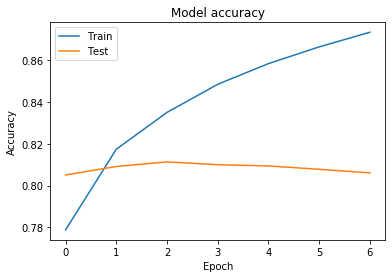

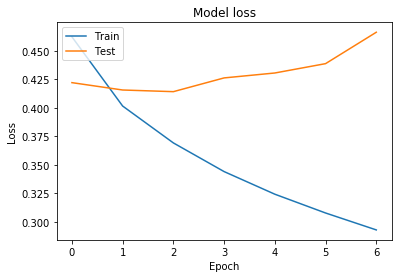

In [12]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show() 


## Actual predictions




In [13]:
test_1 = "my favorite service out there i am simply in love with this"
test_2 = "good service personel is friendly and good job"
test_3 = "better than a lot of its competitors but a little bit under my expectations satisfying altogether"
test_4 = "maybe I like this service I am still not sure"
test_5 = "not the kind of service I would pay for but definetly something to keep a close eye on"
test_6 = "i am a little disappointed by this service"
test_7 = "tot a good service not a welcoming team a very sour experience what do u have exactly"
test_8 = "so bad absolutely one of the worst"
test_9 = "why all these bad predictions i can't understand"

test_samples = [test_1,test_2,test_3,test_4,test_5,test_6,test_7,test_8,test_9]

test_samples_tokens = tokenizer.texts_to_sequences(test_samples)

predicted_tokenized = pad_sequences(test_samples_tokens, maxlen=MAX_WORDS, padding='post')
print(model.predict(predicted_tokenized))

print(model.predict_classes(predicted_tokenized))

[[0.9754944 ]
 [0.99792826]
 [0.9349408 ]
 [0.15372747]
 [0.30885386]
 [0.02287856]
 [0.06333509]
 [0.03600538]
 [0.22773565]]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
